In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.color_palette('Set2')
dlsu_green = "#117a65ff"

from sklearn import datasets
from sklearn.model_selection import train_test_split
from numpy.testing import assert_almost_equal
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

## KNN Using Sklearn

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

## Load wine dataset

In [4]:
wine_df = pd.read_csv('winequality-red.csv')

In [18]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


## Exploratory Analysis

## Distribution of Wine Quality

C:\ProgramData\Anaconda3\envs\DATA102\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'ax' is not defined

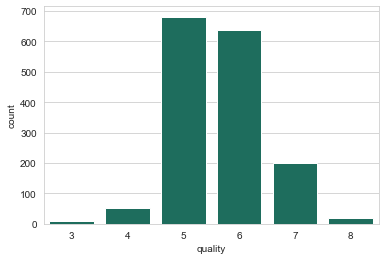

In [8]:
sns.countplot(wine_df['quality'], color=dlsu_green)
ax.set_title('Distribution of Wine Quality')

C:\ProgramData\Anaconda3\envs\DATA102\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

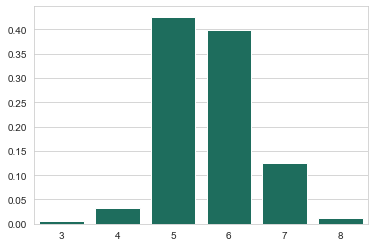

In [11]:
res = wine_df['quality'].value_counts(normalize=True)
sns.barplot(res.index, res.values, color=dlsu_green)

## Correlation of Features

<AxesSubplot:>

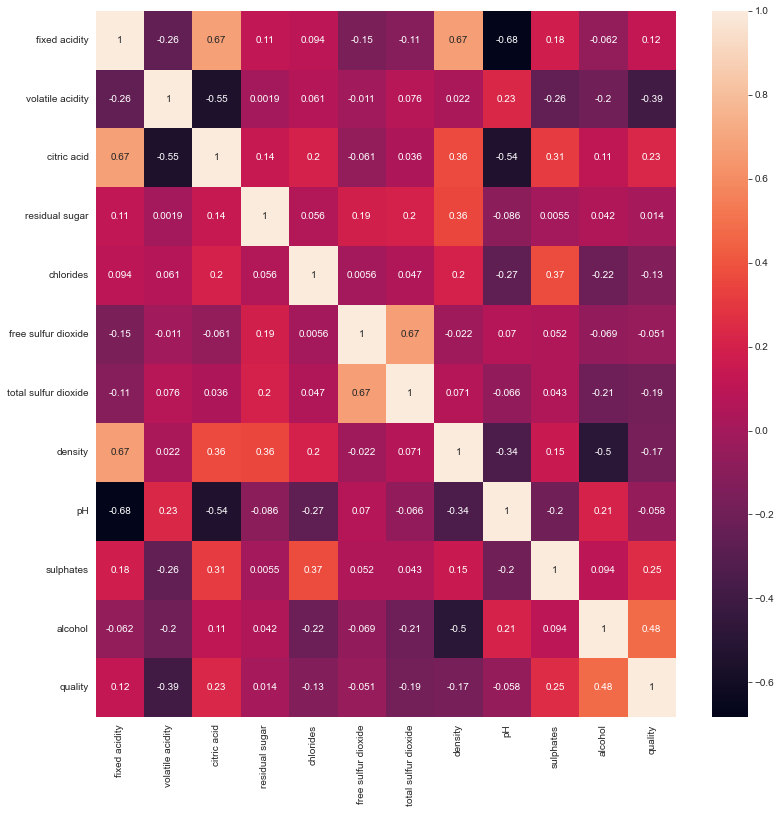

In [15]:
corr = wine_df.corr()
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(corr, ax=ax, annot=True)

## Re-frame our problem, from regression to classification

In [16]:
wine_df['quality_label'] = wine_df['quality'].apply(lambda x: 1 if x >=7 else 0)
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [17]:
print(wine_df['quality_label'].value_counts())
print(wine_df['quality_label'].value_counts(normalize=True))

0    1382
1     217
Name: quality_label, dtype: int64
0    0.86429
1    0.13571
Name: quality_label, dtype: float64


# Build Model

## Train-Val-Test Split Data

In [22]:
X = wine_df.loc[:, 'fixed acidity':'alcohol']
y = wine_df['quality_label']

display(X.head())
display(y)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality_label, Length: 1599, dtype: int64

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, random_state=42)

print('Train ', X_train.shape)
print('Test', X_test.shape)
print('Val', X_val.shape)

Train  (323, 13)
Test (102, 13)
Val (81, 13)


## Create an Initial Model & Check for Accuracy

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
clf = KNeighborsClassifier(n_neighbors = 3, p=2)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
clf.score(X_test, y_test)

0.84375

In [32]:
clf.score(X_val, y_val)

0.86328125

In [33]:
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Optimize Model 

In [36]:
res =[]
for k in range(1,20):
    clf = KNeighborsClassifier(n_neighbors=k, p =2)
    clf.fit(X_train, y_train)
    res.append([k, clf.score(X_val, y_val), clf.score(X_test, y_test)])
    
res_df = pd.DataFrame(res, columns=['k', 'val_accuracy', 'test_accuracy'])
res_df

,k,val_accuracy,test_accuracy
0,1,0.878906,0.846875
1,2,0.882812,0.850000
2,3,0.863281,0.843750
3,4,0.886719,0.843750
4,5,0.871094,0.846875
5,6,0.875000,0.850000
6,7,0.871094,0.846875
7,8,0.871094,0.837500
8,9,0.863281,0.837500
9,10,0.886719,0.846875


C:\ProgramData\Anaconda3\envs\DATA102\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\DATA102\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='k', ylabel='val_accuracy'>

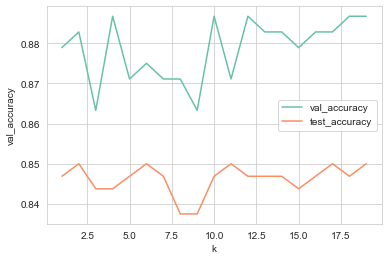

In [39]:
sns.lineplot(res_df.k, res_df.val_accuracy, label="val_accuracy")
sns.lineplot(res_df.k, res_df.test_accuracy, label="test_accuracy")

In [40]:
res_df.max()

k                19.000000
val_accuracy      0.886719
test_accuracy     0.850000
dtype: float64

## Regression

We'll be using another dataset for the regression task since we need continuous values as labels / outputs / targets. One readily-available dataset for this is the **Boston dataset**. It contains the house pricing data in Boston as well as the following features:

 - CRIM per capita crime rate by town
 - ZN proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS proportion of non-retail business acres per town
 - CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX nitric oxides concentration (parts per 10 million)
 - RM average number of rooms per dwelling
 - AGE proportion of owner-occupied units built prior to 1940
 - DIS weighted distances to five Boston employment centres
 - RAD index of accessibility to radial highways
 - TAX full-value property-tax rate per \$10,000
 - PTRATIO pupil-teacher ratio by town
 - B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT % lower status of the population
 - MEDV Median value of owner-occupied homes in $1000’s

For more info, please see <a href="https://scikit-learn.org/stable/datasets/index.html#boston-dataset">this link</a>.

And, as usual, we will also be splitting the dataset into train and test sets.

In [75]:
X, y = datasets.load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")

Original Size | Input: (506, 13), Output: (506,)
Train Set Size | Input: (404, 13), Output: (404,)
Test Set Size | Input: (102, 13), Output: (102,)


C:\ProgramData\Anaconda3\envs\DATA102\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

In [76]:
train_set = np.concatenate((X_train, y_train.reshape(-1,1)), axis=1)
columns = datasets.load_boston()['feature_names'].tolist() + ['target']
df_train = pd.DataFrame(train_set, columns=columns)
df_train['target'] = df_train['target'].astype(int)

test_set = np.concatenate((X_test, y_test.reshape(-1,1)), axis=1)
df_test = pd.DataFrame(test_set, columns=columns)
df_test['target'] = df_test['target'].astype(int)

df_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12
1,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19
2,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19
3,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,13
4,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18


## Modeling

### Create the function to calculate the R-squared

For reference, here's the formula for R-squared:

$$R^{2} (y,\hat{y}) = 1- \dfrac{\Sigma_i (y_i - \hat{y}_i)^2}{\Sigma_i (y_i - \bar{y})^2}$$

In [60]:
def r_squared(y_true:np.array, y_pred:np.array) -> float:
    '''
    Returns the score using R-squared metric.
    '''
    r = 1 - ((y_true-y_pred)**2).sum() / ((y_true - np.mean(y_true))**2).sum()
    return r

In [61]:
assert_almost_equal(0.9458413926499033, r_squared(np.array([14,18,17,20,21,26,28]),  
                                                  np.array([14,19,16,20,22,25,26])))

In [77]:
clf = KNeighborsRegressor(n_neighbors = 3, p = 2)
clf.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [78]:
y_pred = clf.predict(X_test)

In [79]:
r_squared(y_test, y_pred)

0.7046442656646525

In [80]:
r2_score(y_test,y_pred)

0.7046442656646525

## Optimize Model by Testing out Different K Values

In [88]:
res =[]
for k in range(1,20):
    clf = KNeighborsRegressor(n_neighbors = k, p = 2)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    res.append([k, clf.score(X_test, y_test),r2_score(y_test,y_pred)])
    
res_df = pd.DataFrame(res, columns=['k', 'test_accuracy', 'r_squared'])
res_df

,k,test_accuracy,r_squared
0,1,0.417921,0.417921
1,2,0.555465,0.555465
2,3,0.704644,0.704644
3,4,0.671762,0.671762
4,5,0.647364,0.647364
5,6,0.616232,0.616232
6,7,0.596783,0.596783
7,8,0.544964,0.544964
8,9,0.522699,0.522699
9,10,0.503806,0.503806


C:\ProgramData\Anaconda3\envs\DATA102\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\DATA102\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='k', ylabel='val_accuracy'>

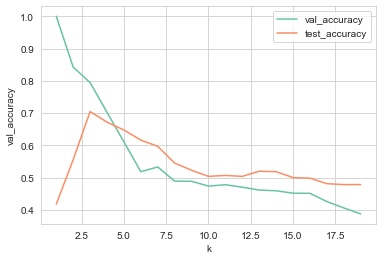

In [82]:
sns.lineplot(res_df.k, res_df.val_accuracy, label="val_accuracy")
sns.lineplot(res_df.k, res_df.test_accuracy, label="test_accuracy")

In [86]:
res_df['test_accuracy'].max()

0.7046442656646525